### Projet Python: Clémence Millet et Malo Parcy

# Comment expliquer les succès sportifs ?

## Partie I : Vue d'ensemble des sportifs les mieux rémunérés au monde

On s'intéresse tout d'abord aux sportifs ayant les revenus les plus élevés, toutes disciplines confondues, à partir des classements effectués chaque année par le magazine Forbes. Ces salaires parfois monumentaux révèle un indiscutable succès de ces grands athlètes, mais celui-ci provient-il uniquement de leurs performances sportives, et si oui, quels facteurs peuvent les expliquer ? Sinon, on s'intéressera également à des facteurs extérieur, tels que leur célébrité sur les réseaux sociaux, ou l'audience dont bénéficie leur discpline. 

On dispose pour cela de deux bases de données : la première contient les 10 premiers sportifs du classement Forbes de 1990 à 2019, et la seconde correspond au classement entier de 2020 avec les 100 athlètes les mieux payés de l'année.


### 1) Récupération des données et aperçu général des données

In [17]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#On récupère la base de données des 10 athlètes les mieux payés du monde chaque année depuis 1990, disponible sur kaggle

dfile = open('C:\\Users\\Clémence Millet\\Documents\\GitHub\\Projet_Sportifs\\Forbes data.csv', 'r')
reader = csv.DictReader(dfile, delimiter=';')
df_ev = pd.read_csv(dfile)
df_ev

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1.0,NaN,Boxing,1990.0,28.6
1,2,Buster Douglas,USA,2.0,NaN,Boxing,1990.0,26.0
2,3,Sugar Ray Leonard,USA,3.0,NaN,Boxing,1990.0,13.0
3,4,Ayrton Senna,Brazil,4.0,NaN,Auto Racing,1990.0,10.0
4,5,Alain Prost,France,5.0,NaN,Auto Racing,1990.0,9.0
...,...,...,...,...,...,...,...,...
286,287,Russell Wilson,USA,6.0,??,Football,2019.0,89.5
287,288,Aaron Rogers,USA,7.0,??,Football,2019.0,89.3
288,289,LeBron James,USA,8.0,6,Basketball,2019.0,89.0
289,290,Stephen Curry,USA,9.0,8,Basketball,2019.0,79.8


In [152]:
#On calcule le revenu moyen des athlètes pour chaque discipline sportive

df_ev.Sport = df_ev.Sport.astype(str).str.lower() #On normalise l'écriture des différents sports avec des minuscules
df_ev.groupby('Sport').mean()['earnings ($ million)'].sort_values(ascending=False)

Sport
mixed martial arts    99.000000
soccer                63.966667
boxing                50.857778
golf                  48.237209
football              44.294737
tennis                41.409091
basketball            40.592405
auto racing           32.027778
motorcycle            32.000000
cycling               28.000000
baseball              24.350000
ice hockey            19.266667
hockey                17.900000
nan                         NaN
Name: earnings ($ million), dtype: float64

In [29]:
#On cherche les athlètes présents le plus de fois dans la base de données

df_ev.groupby(['Name','Sport']).size().sort_values(ascending=False)[0:15]

Name                Sport      
Michael Jordan      basketball     19
Tiger Woods         golf           18
Kobe Bryant         basketball     14
Michael Schumacher  auto racing    13
LeBron James        basketball     12
Roger Federer       tennis         11
Phil Mickelson      golf           11
Shaquille O'Neal    basketball      9
Cristiano Ronaldo   soccer          9
David Beckham       soccer          9
Lionel Messi        soccer          8
Mike Tyson          boxing          8
Oscar De La Hoya    boxing          7
Evander Holyfield   boxing          7
Grant Hill          basketball      6
dtype: int64

On constate que les revenus les plus élevés sont clairement récoltés en divers arts martiaux et en soccer (football européen), alors que les différentes disciplines du hockey ou le baseball sont moins rémunérés. 
Cela dit, on remarque une impressionnante longévité de plusieurs joueurs de basketball, en particulier Michael Jordan qui a compté pendant 19 ans parmi les 10 sportifs les mieux payés du monde. En revanche, des sports comme le football américain ou la course automobile sont moins représentés sur la longueur, peut-être parce que ces sports ayant une plus faible visibilité, les athlètes ont moins de possibilités de prospérer lorsque le pic de leurs performances sportives est passé.

**On s'intéresse justement à présent à l'évolution de ces revenus et des différentes discplines.**


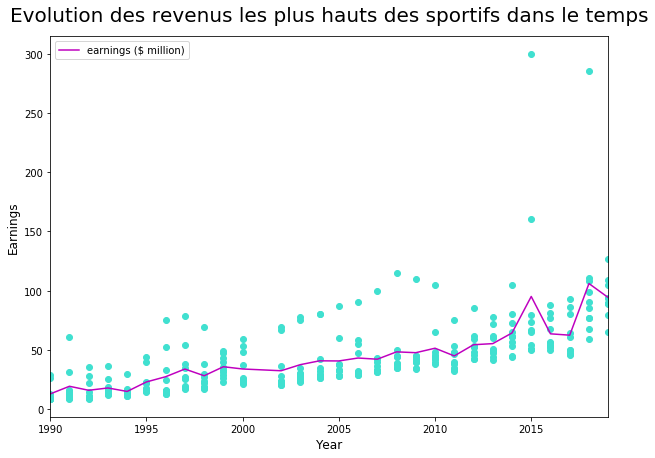

In [160]:
#Traçons le graphe de l'évolution du revenu des joueurs dans le temps

plt.figure(figsize=(10,7))
plt.scatter(df_ev['Year'],df_ev['earnings ($ million)'], color='turquoise')
plt.title('Evolution des revenus les plus hauts des sportifs dans le temps', fontsize=20, pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Earnings', fontsize=12)
df_ev.groupby('Year').mean()['earnings ($ million)'].plot(color='m') #On ajoute la droite des revenus moyens par année
plt.legend(frameon=True)
plt.show()

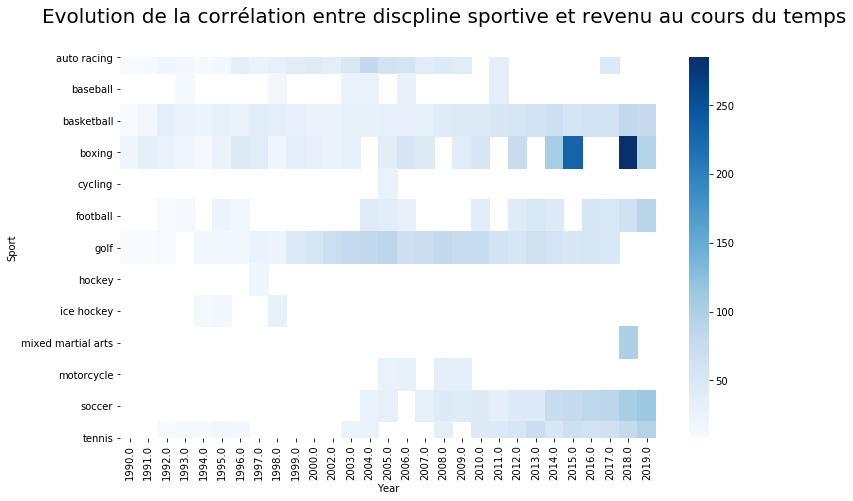

In [168]:
#On dessine une heatmap pour visualiser l'évolution de l'importance des disciplines sportives au cours dans années

heatmap1 = pd.pivot_table(df_ev, values='earnings ($ million)', 
                     index=['Sport'], 
                     columns='Year')

plt.figure(figsize=(12, 7))
sns.heatmap(heatmap1, cmap="Blues")
plt.gcf().suptitle('Evolution de la corrélation entre discpline sportive et revenu au cours du temps', fontsize=20)
plt.show()

Ainsi, les plus hauts salaires sportifs ont évolué au cours de la période, ils se passés en moyenne de 20 millions en 1990 à 80 millions environ en 2019 : ils ont donc été multipliés par un facteur 4 en 20 ans. Cette augmentation a été progressive et régulière jusqu'en 2013 environ puis elle s'est accentuée tout en s'accompagnant d'à-coups au gré de la présence de contrats monumentaux, en particulier pour le boxeur Mayweather. 

De plus, la répartition des sports dans les classements a évolué: si la boxe, le basketball et le golf sont présents tout au long de la période avec de hauts niveaux de revenus, la course automobile semble avoir perdu du terrain tandis que le tennis (qui connaît une période intense avec quelques joueurs extrêmement performants) et le soccer (discipline qui a récemment explosé en terme de popularité et de rémunération des joueurs) remonte dans les classements. 

**On s'intéresse à présent uniquement au classement 2020 des 100 athlètes les mieux rémunérés, qui contient davantage de variables donc davantage de possibilités pour notre analyse**


In [169]:
dfile = open('C:\\Users\\Clémence Millet\\Documents\\GitHub\Projet_Sportifs\\Base 2020.csv', 'r')
reader = csv.DictReader(dfile, delimiter=';')
df_2020 = pd.read_csv(dfile)
df_2020


,Name,Rank,earnings,Salary/Winnings,Sport,Male,Followers on Instagram (M),Country
0,Roger Federer,1,106.3,6.3,Tennis,1,8.000,Switzerland
1,Cristiano Ronaldo,2,105.0,60.0,Soccer,1,244.000,Portugal
2,Lionel Messi,3,104.0,72.0,Soccer,1,170.000,Argentina
3,Neymar,4,95.5,70.5,Soccer,1,143.000,Brazil
4,LeBron James,5,88.2,28.2,Basketball,1,74.800,USA
...,...,...,...,...,...,...,...,...
95,Bradley Beal,96,22.3,20.3,Basketball,1,1.200,USA
96,Cam Newton,97,22.2,16.7,Football,1,4.900,USA
97,Calais Campbell,98,22.1,22.0,Football,1,0.161,USA
98,Derek Carr,99,22.0,20.0,Football,1,0.716,USA


In [139]:
df_2020.groupby('Male').size()


Male
0     2
1    98
dtype: int64

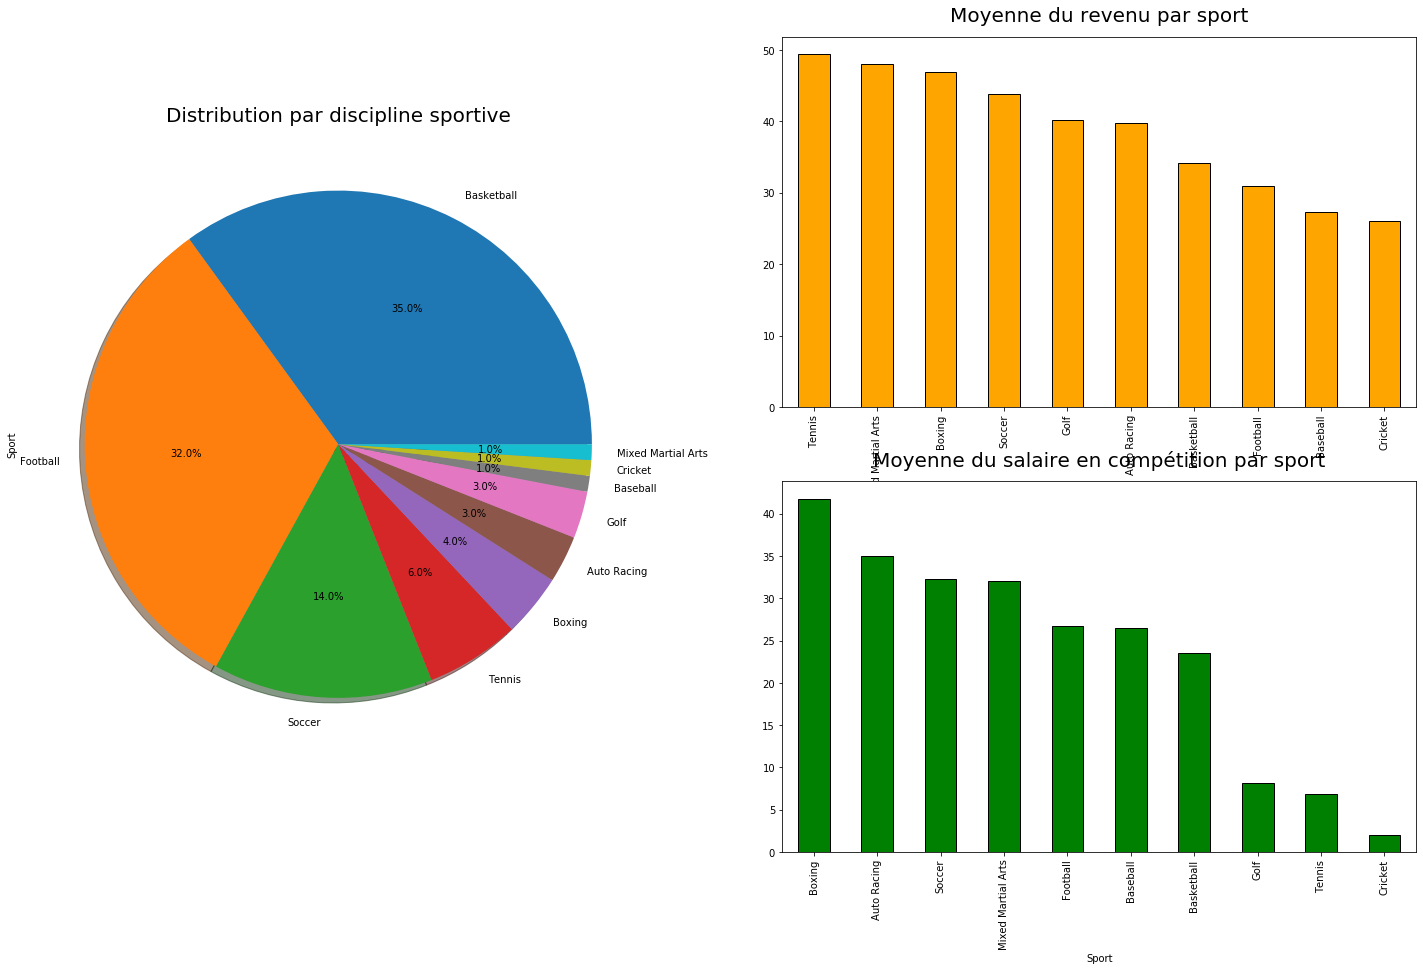

In [131]:
plt.figure(figsize=(25, 15))
plt.subplot(121)
df_2020["Sport"].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title('Distribution par discipline sportive', fontsize = 20)
plt.subplot(222)
df_2020.groupby('Sport').mean()['earnings'].sort_values(ascending = False).plot(kind='bar', color='orange', edgecolor='black')
plt.title('Moyenne du revenu par sport', fontsize=20, pad=15)
plt.subplot(224)
df_2020.groupby('Sport').mean()['Salary/Winnings'].sort_values(ascending = False).plot(kind='bar', color='green', edgecolor='black')
plt.title('Moyenne du salaire en compétition par sport', fontsize = 20, pad=15)
plt.show()



In [47]:
df_2020['geo zone'] = 1

for i in range(100):
    if df_2020['Country'][i] in ['France', 'Germany', 'UK', 'Portugal', 'Spain', 'Switzerland', 'Greece', 'Latvia', 'Serbia', 'Ireland']:
        df_2020['geo zone'][i]='Europe'
    elif df_2020['Country'][i] in ['Brazil', 'Chile', 'Argentina']:
        df_2020['geo zone'][i]='South America'
    else:
        df_2020['geo zone'][i]=df_2020['Country'][i]


df_2020



C:\Users\Clémence Millet\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Clémence Millet\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Clémence Millet\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users

,Name,Rank,earnings,Salary/Winnings,Sport,Male,Followers on Instagram (M),Country,geo zone
0,Roger Federer,1,106.3,6.3,Tennis,1,8.000,Switzerland,Europe
1,Cristiano Ronaldo,2,105.0,60.0,Soccer,1,244.000,Portugal,Europe
2,Lionel Messi,3,104.0,72.0,Soccer,1,170.000,Argentina,South America
3,Neymar,4,95.5,70.5,Soccer,1,143.000,Brazil,South America
4,LeBron James,5,88.2,28.2,Basketball,1,74.800,USA,USA
...,...,...,...,...,...,...,...,...,...
95,Bradley Beal,96,22.3,20.3,Basketball,1,1.200,USA,USA
96,Cam Newton,97,22.2,16.7,Football,1,4.900,USA,USA
97,Calais Campbell,98,22.1,22.0,Football,1,0.161,USA,USA
98,Derek Carr,99,22.0,20.0,Football,1,0.716,USA,USA


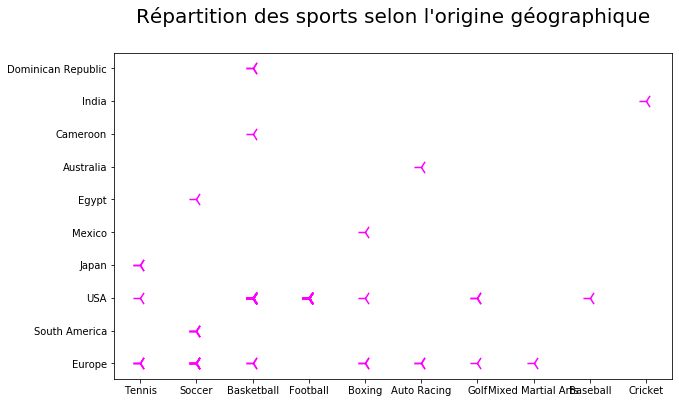

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df_2020['Sport'], df_2020['geo zone'], c='magenta', marker='3', s=200)
plt.title('Répartition des sports selon l\'origine géographique', fontsize=20, pad=30)
plt.show()

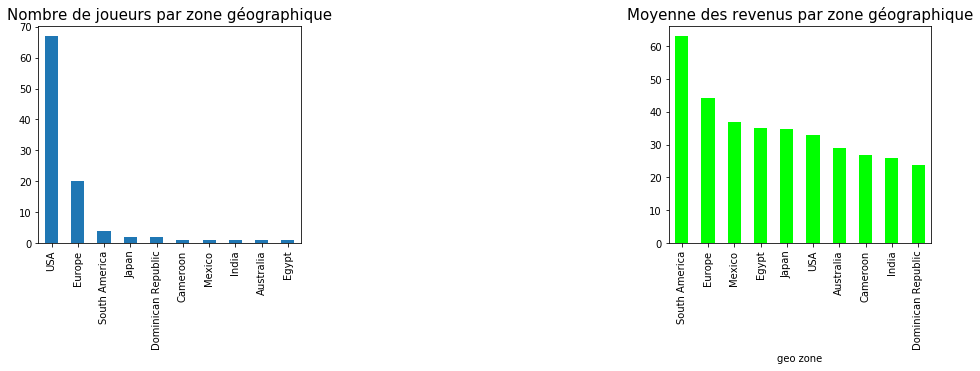

In [165]:
plt.figure(figsize=(16, 4))
plt.subplot(131)
df_2020['geo zone'].value_counts().plot(kind='bar')
plt.title('Nombre de joueurs par zone géographique', fontsize=15)
plt.subplot(133)
df_2020.groupby('geo zone').mean()['earnings'].sort_values(ascending=False).plot(kind='bar', color='lime')
plt.title('Moyenne des revenus par zone géographique', fontsize=15)
plt.show()

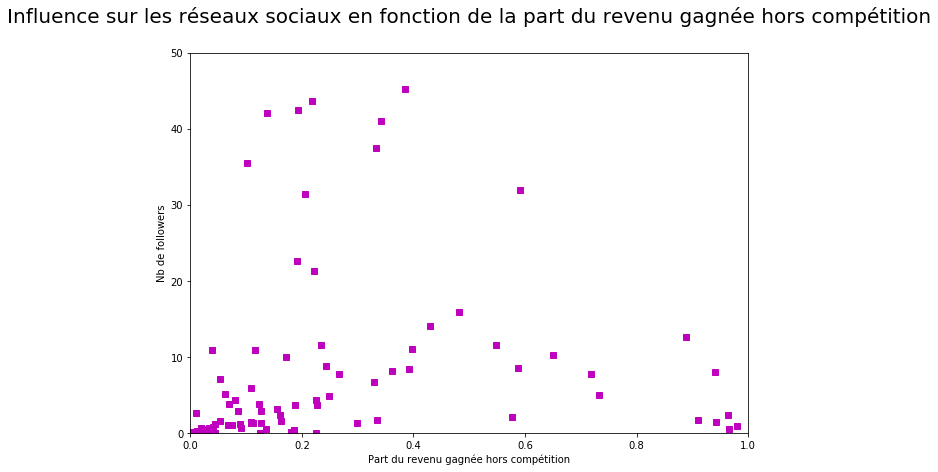

In [110]:
plt.figure(figsize=(10, 7))
plt.plot(1-(df_2020['Salary/Winnings']/df_2020['earnings']), df_2020['Followers on Instagram (M)'], "ms")
plt.title('Influence sur les réseaux sociaux en fonction de la part du revenu gagnée hors compétition', fontsize = 20, pad=30)
plt.xlabel('Part du revenu gagnée hors compétition')
plt.ylabel('Nb de followers')
plt.axis([0, 1, 0, 50])
plt.show()

Partie II : Web scraping


In [48]:
import urllib
import bs4
import collections

In [132]:
#On ôte les joueurs dont on arrive pas à accéder à la page Wikipédia

df2 = df.copy()
df2 = pd.DataFrame(df2.Name.str.replace(' ', '_'))
df2.drop_duplicates(inplace=True)
print(df2.shape)
df2.drop(1,0,inplace=True)
df2.drop(16,0,inplace=True)
df2.drop(64,0,inplace=True)
df2.drop(35,0,inplace=True)
df2.drop(41,0,inplace=True)
df2.drop(79,0,inplace=True)
df2.drop(82,0,inplace=True) #wiki anglais
df2.drop(153,0,inplace=True) #wiki anglais
df2.drop(287,0,inplace=True) 


df2.head(80)


    

NameError: name 'df' is not defined

In [49]:
df_2020_c = df_2020.copy()
df_2020_c = pd.DataFrame(df_2020_c.Name.str.replace(' ', '_'))
df_2020_c.columns = ['Name_1']
df_2020_c['Name']=df_2020['Name']

#df_2020_c.iat[38,0] ='Michael_Thomas_(football_américain,_1993)'
df_2020_c.drop(38,0,inplace=True)
df_2020_c.iat[42,0]='Anthony_Davis_(basket-ball)'
df_2020_c.iat[54,0]='Oscar_(football)'
df_2020_c.iat[60,0]='Devin_Booker_(basket-ball,_1996)'
df_2020_c.iat[62,0]='D%27Angelo_Russell'
df_2020_c.iat[69,0]='Mike_Conley,_Jr.'
df_2020_c.drop(85,0,inplace=True) #Shaq Thompson
df_2020_c.drop(93,0,inplace=True) #DJ Reader


df_2020_c.iloc[0:10]

,Name_1,Name
0,Roger_Federer,Roger Federer
1,Cristiano_Ronaldo,Cristiano Ronaldo
2,Lionel_Messi,Lionel Messi
3,Neymar,Neymar
4,LeBron_James,LeBron James
5,Stephen_Curry,Stephen Curry
6,Kevin_Durant,Kevin Durant
7,Tiger_Woods,Tiger Woods
8,Kirk_Cousins,Kirk Cousins
9,Carson_Wentz,Carson Wentz


In [50]:
# Récupération de la taille et de l'âge de chaque joueur sur sa page wikipédia

def get_page(player_name):
    url_wiki_player = 'https://fr.wikipedia.org/wiki/'+ player_name
    req = urllib.request.Request(url_wiki_player)
    html = urllib.request.urlopen(req).read()
    return bs4.BeautifulSoup(html, "lxml")

def get_feat_player(player_name):
    page = get_page(player_name)
    data = collections.defaultdict()
    tableau = page.find('table', {'class': 'infobox_v2'})
    tableau1 = page.find('div', {'class': 'infobox_v3'})
    tableau2 = page.find('div', {'class': 'infobox_v3 bordered'})
    height = 0

    if page.find('time', {'class': 'nowrap date-lien bday'}) is not None:
        date = page.find('time', {'class': 'nowrap date-lien bday'}).get('datetime')
    else:
        date = page.find('time', {'class': 'nowrap date-lien'}).get('datetime')
    
    if tableau is not None:
        for feat2 in tableau.findAll('tr'):
            if feat2.find('th') is not None:
                if feat2.find('th').getText() == 'Taille\n':
                    height = feat2.find('td').getText().replace('\n','')
    elif tableau1 is not None:
        for feat4 in tableau1.findAll('tr'):
            if feat4.find('th') is not None:
                if feat4.find('th').getText() == 'Taille\n':
                    height = feat4.find('td').getText().replace('\n','')
    elif tableau2 is not None:
        for feat6 in tableau1.findAll('tr'):
            if feat6.find('th') is not None:
                if feat6.find('th').getText() == 'Taille\n':
                    height = feat6.find('td').getText().replace('\n','')        
 

    data['Birth'] = date
    data['Height'] = height
    data['Name_1'] = player_name
    return dict(data)

# Création d'une base de donnée avec ces informations  

items = []       
for player in df_2020_c.iloc[0:100, 0] : 
    print(player)
    item = get_feat_player(player)       
    items.append(item)
    
df_bh = pd.DataFrame(items)
df_bh.tail()    

Roger_Federer
Cristiano_Ronaldo
Lionel_Messi
Neymar
LeBron_James
Stephen_Curry
Kevin_Durant
Tiger_Woods
Kirk_Cousins
Carson_Wentz
Tyson_Fury
Russell_Westbrook
Lewis_Hamilton
Rory_McIlroy
Jared_Goff
Conor_McGregor
James_Harden
Giannis_Antetokounmpo
Anthony_Joshua
Deontay_Wilder
Tom_Brady
Drew_Brees
Novak_Djokovic
Kyrie_Irving
Phil_Mickelson
Julio_Jones
Rafael_Nadal
Klay_Thompson
Naomi_Osaka
Canelo_Alvarez
Damian_Lillard
Sebastian_Vettel
Serena_Williams
Mohamed_Salah
Chris_Paul
Kylian_Mbappe
Grady_Jarrett
Paul_George
Kei_Nishikori
Blake_Griffin
John_Wall
Kawhi_Leonard
Anthony_Davis_(basket-ball)
Aaron_Rodgers
Andres_Iniesta
Matt_Ryan
Daniel_Ricciardo
Mesut_Ozil
Kyle_Lowry
Paul_Pogba
Jimmy_Butler
Gordon_Hayward
Jordan_Spieth
Kemba_Walker
Oscar_(football)
Clayton_Kershaw
Zion_Williamson
Arik_Armstead
Joel_Embiid
Antoine_Griezmann
Devin_Booker_(basket-ball,_1996)
Christian_McCaffrey
D%27Angelo_Russell
Darius_Slay
Virat_Kohli
David_De_Gea
Kevin_Love
Alexis_Sanchez
Ryan_Tannehill
Mike_Conley,

,Birth,Height,Name_1
92,1993-06-28,"1,91 m (6′ 3″)[1]",Bradley_Beal
93,1989-05-11,0,Cam_Newton
94,1986-09-01,0,Calais_Campbell
95,1991-03-28,0,Derek_Carr
96,1986-03-30,"1,84 m (6′ 0″)[1]",Sergio_Ramos


In [51]:
dfm_bh = pd.merge(df_bh,df_2020_c)

dfm_bh



,Birth,Height,Name_1,Name
0,1981-08-08,"1,85 m (6′ 1″)",Roger_Federer,Roger Federer
1,1985-02-05,"1,87 m (6′ 2″)[1]",Cristiano_Ronaldo,Cristiano Ronaldo
2,1987-06-24,"1,70 m (5′ 7″)[2]",Lionel_Messi,Lionel Messi
3,1992-02-05,"1,75 m (5′ 9″)[1]",Neymar,Neymar
4,1984-12-30,"2,06 m (6′ 9″)[1]",LeBron_James,LeBron James
...,...,...,...,...
92,1993-06-28,"1,91 m (6′ 3″)[1]",Bradley_Beal,Bradley Beal
93,1989-05-11,0,Cam_Newton,Cam Newton
94,1986-09-01,0,Calais_Campbell,Calais Campbell
95,1991-03-28,0,Derek_Carr,Derek Carr


In [52]:
dfm_bh.loc[97] = ['1993-03-03', '1,91 m', 'Michael_Thomas', 'Michael Thomas']
dfm_bh.loc[98] = ['1994-04-21', '1,83 m', 'Shaq_Thompson', 'Shaq Thompson']
dfm_bh.loc[99] = ['1994-07-01', '1,91 m', 'D._J._Reader', 'D. J. Reader']
dfm_bh.tail(15)

,Birth,Height,Name_1,Name
85,1981-12-08,0,Philip_Rivers,Philip Rivers
86,1995-07-22,0,Ezekiel_Elliott,Ezekiel Elliott
87,1985-02-10,"2,01 m (6′ 7″)",Paul_Millsap,Paul Millsap
88,1982-03-02,0,Ben_Roethlisberger,Ben Roethlisberger
89,1993-11-04,0,Andrus_Peat,Andrus Peat
90,1993-08-10,"2,11 m (6′ 11″)",Andre_Drummond,Andre Drummond
91,1997-12-21,0,Quinnen_Williams,Quinnen Williams
92,1993-06-28,"1,91 m (6′ 3″)[1]",Bradley_Beal,Bradley Beal
93,1989-05-11,0,Cam_Newton,Cam Newton
94,1986-09-01,0,Calais_Campbell,Calais Campbell


In [55]:
from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

dfm_bh['Age'] = 1


for i in range(100):
    dfm_bh['Age'][i] = calculate_age(datetime.strptime(dfm_bh['Birth'][i], "%Y-%m-%d"))  
    if dfm_bh['Height'][i] != 0:
        dfm_bh['Height'][i] = dfm_bh['Height'][i][0:4]
        dfm_bh['Height'][i] = dfm_bh['Height'][i].replace(',','.')
        dfm_bh['Height'][i] = float(dfm_bh['Height'][i])

dfm_bh



C:\Users\Clémence Millet\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Clémence Millet\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Clémence Millet\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,Birth,Height,Name_1,Name,Age
0,1981-08-08,1.85,Roger_Federer,Roger Federer,39
1,1985-02-05,1.87,Cristiano_Ronaldo,Cristiano Ronaldo,35
2,1987-06-24,1.7,Lionel_Messi,Lionel Messi,33
3,1992-02-05,1.75,Neymar,Neymar,28
4,1984-12-30,2.06,LeBron_James,LeBron James,35
...,...,...,...,...,...
95,1991-03-28,0,Derek_Carr,Derek Carr,29
96,1986-03-30,1.84,Sergio_Ramos,Sergio Ramos,34
97,1993-03-03,1.91,Michael_Thomas,Michael Thomas,27
98,1994-04-21,1.83,Shaq_Thompson,Shaq Thompson,26


In [56]:
df_2020_bh = pd.merge(df_2020,dfm_bh)
df_2020_bh.iloc[90:95]


,Name,Rank,earnings,Salary/Winnings,Sport,Male,Followers on Instagram (M),Country,geo zone,Birth,Height,Name_1,Age
90,Ben Roethlisberger,91,23.0,22.0,Football,1,0.030,USA,USA,1982-03-02,0,Ben_Roethlisberger,38
91,Andrus Peat,92,22.7,22.6,Football,1,0.017,USA,USA,1993-11-04,0,Andrus_Peat,27
92,Andre Drummond,93,22.6,21.6,Basketball,1,1.200,USA,USA,1993-08-10,2.11,Andre_Drummond,27
93,D. J. Reader,94,22.4,22.3,Football,1,0.038,USA,USA,1994-07-01,1.91,D._J._Reader,26
94,Quinnen Williams,95,22.4,22.2,Football,1,0.197,USA,USA,1997-12-21,0,Quinnen_Williams,22


Partie III : Analyse des données et régression

In [57]:
dfile = open('C:\\Users\\Clémence Millet\\Documents\\GitHub\\Projet_Sportifs\\Base Sports.csv', 'r')
reader = csv.DictReader(dfile, delimiter=',')
df_sports = pd.read_csv(dfile)

dfile = open('C:\\Users\\Clémence Millet\\Documents\\GitHub\\Projet_Sportifs\\Base pays.csv', 'r')
reader = csv.DictReader(dfile, delimiter=',')
df_pays = pd.read_csv(dfile)


df_sports

,Sport,Nb of fans estimated
0,Soccer,4.00
1,Basketball,3.00
2,Football,0.41
3,Baseball,0.50
4,Tennis,1.00
5,Cricket,2.50
6,Golf,0.40
7,Boxing,0.25
8,Auto Racing,0.55
9,Mixed Martial Arts,0.25


In [58]:
df_2020_bis = pd.merge(df_2020_bh,df_sports)
df_2020_bis

,Name,Rank,earnings,Salary/Winnings,Sport,Male,Followers on Instagram (M),Country,geo zone,Birth,Height,Name_1,Age,Nb of fans estimated
0,Roger Federer,1,106.3,6.3,Tennis,1,8.00,Switzerland,Europe,1981-08-08,1.85,Roger_Federer,39,1.00
1,Novak Djokovic,23,44.6,12.6,Tennis,1,7.80,Serbia,Europe,1987-05-22,1.88,Novak_Djokovic,33,1.00
2,Rafael Nadal,27,40.0,14.0,Tennis,1,10.30,Spain,Europe,1986-06-03,1.85,Rafael_Nadal,34,1.00
3,Naomi Osaka,29,37.4,3.4,Tennis,0,1.80,Japan,Japan,1997-10-16,1.8,Naomi_Osaka,23,1.00
4,Serena Williams,33,36.0,4.0,Tennis,0,12.70,USA,USA,1981-09-26,1.75,Serena_Williams,39,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Phil Mickelson,25,40.8,0.8,Golf,1,1.00,USA,USA,1970-06-16,1.88,Phil_Mickelson,50,0.40
96,Jordan Spieth,54,27.6,1.6,Golf,1,1.50,USA,USA,1993-07-27,1.85,Jordan_Spieth,27,0.40
97,Conor McGregor,16,48.0,32.0,Mixed Martial Arts,1,37.50,Ireland,Europe,1988-07-14,1.75,Conor_McGregor,32,0.25
98,Clayton Kershaw,57,27.3,26.5,Baseball,1,0.42,USA,USA,2014-06-18,0,Clayton_Kershaw,6,0.50


In [125]:
dfm_2020 = pd.merge(df_2020_bis,df_pays)
dfm_2020['Endorsements']= dfm_2020['earnings']-dfm_2020['Salary/Winnings']
dfm_2020

,Name,Rank,earnings,Salary/Winnings,Sport,Male,Followers on Instagram (M),Country,geo zone,Birth,Height,Name_1,Age,Nb of fans estimated,GDP (Mds),Population (M),Impact Covid,Endorsements
0,Roger Federer,1,106.3,6.3,Tennis,1,8.0,Switzerland,Europe,1981-08-08,1.85,Roger_Federer,39,1.00,706,9,0.0,100.0
1,Novak Djokovic,23,44.6,12.6,Tennis,1,7.8,Serbia,Europe,1987-05-22,1.88,Novak_Djokovic,33,1.00,51,7,0.0,32.0
2,Rafael Nadal,27,40.0,14.0,Tennis,1,10.3,Spain,Europe,1986-06-03,1.85,Rafael_Nadal,34,1.00,1426,47,12.8,26.0
3,Andres Iniesta,46,29.6,26.6,Soccer,1,35.5,Spain,Europe,1984-05-11,1.7,Andres_Iniesta,36,4.00,1426,47,12.8,3.0
4,David De Gea,67,25.7,22.7,Soccer,1,11.0,Spain,Europe,1990-11-07,1.92,David_De_Gea,30,4.00,1426,47,12.8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Karl-Anthony Towns,87,23.5,20.5,Basketball,1,2.9,Dominican Republic,Dominican Republic,1995-11-15,2.11,Karl-Anthony_Towns,25,3.00,81,10,0.0,3.0
96,Canelo Alvarez,30,37.0,35.0,Boxing,1,7.1,Mexico,Mexico,1990-07-18,1.73,Canelo_Alvarez,30,0.25,1224,128,0.0,2.0
97,Daniel Ricciardo,48,29.0,27.0,Auto Racing,1,3.9,Australia,Australia,1989-07-01,0,Daniel_Ricciardo,31,0.55,1432,25,4.5,2.0
98,Conor McGregor,16,48.0,32.0,Mixed Martial Arts,1,37.5,Ireland,Europe,1988-07-14,1.75,Conor_McGregor,32,0.25,376,5,10.2,16.0


In [60]:
import scipy

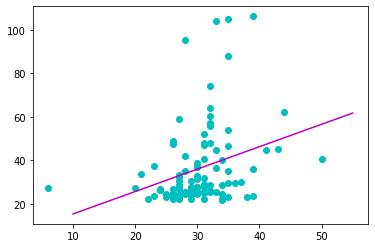

LinregressResult(slope=1.0315348761584737, intercept=4.9881239499214125, rvalue=0.3038920989129897, pvalue=0.002113838724611679, stderr=0.32667099693154616)

In [61]:
lr = stats.linregress(dfm_2020['Age'], dfm_2020['earnings'])

plt.plot(dfm_2020['Age'], dfm_2020['earnings'], 'co')
x = np.linspace(55, 10, 100)
y = lr.slope*x + lr.intercept
plt.plot(x, y, 'm')

plt.show()
lr

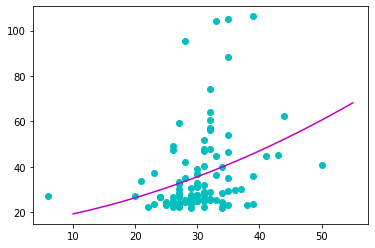

In [62]:
fit = np.polyfit(dfm_2020['Age'], dfm_2020['earnings'], 2)

plt.plot(dfm_2020['Age'], dfm_2020['earnings'], 'co')
x = np.linspace(55, 10, 100)
y = fit[0]*x**2 + fit[1]*x + fit[2]
plt.plot(x, y, 'm')


plt.show()


In [121]:
lr2 = stats.linregress(dfm_2020['Followers on Instagram (M)'], dfm_2020['earnings']-dfm_2020['Salary/Winnings'])
lr8 = stats.linregress(dfm_2020['Nb of fans estimated'], dfm_2020['Followers on Instagram (M)'])
print(lr2)
print(lr8)

LinregressResult(slope=0.1702583061419825, intercept=8.588314881009506, rvalue=0.3663696659534672, pvalue=0.00017764112954131008, stderr=0.043679519084564376)
LinregressResult(slope=9.663410957708232, intercept=-4.150167995021352, rvalue=0.4038307245363947, pvalue=3.094174796111281e-05, stderr=2.211363922465805)


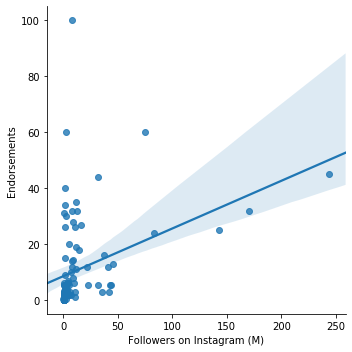

In [130]:
sns.lmplot(x="Followers on Instagram (M)", y="Endorsements", data=dfm_2020)

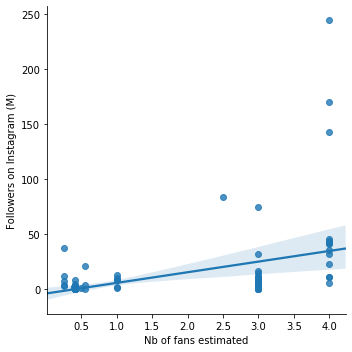

In [131]:
sns.lmplot(x="Nb of fans estimated", y="Followers on Instagram (M)", data=dfm_2020)

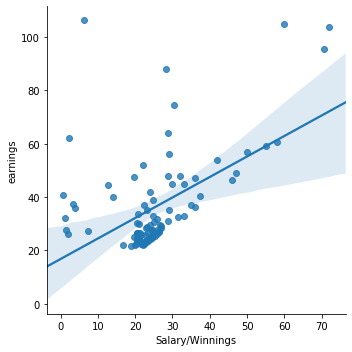

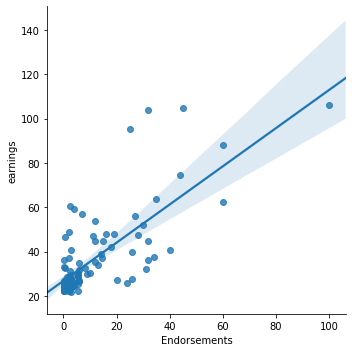

In [139]:
sns.lmplot(x="Salary/Winnings", y="earnings", data=dfm_2020)
sns.lmplot(x="Endorsements", y="earnings", data=dfm_2020)

In [143]:
import statsmodels.api as sm
from sklearn import linear_model

X = dfm_2020["GDP (Mds)"]
X = np.vander(X, 2)
y = df_2020["earnings"]

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())



                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.064
Date:                Mon, 14 Dec 2020   Prob (F-statistic):              0.305
Time:                        16:25:34   Log-Likelihood:                -432.82
No. Observations:                 100   AIC:                             869.6
Df Residuals:                      98   BIC:                             874.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0002      0.000     -1.032      0.3

In [145]:
X = dfm_2020[["Followers on Instagram (M)", "Nb of fans estimated", "Age", "GDP (Mds)"]]
X = sm.add_constant(X) # une autre façons d'ajouter une constante
y = dfm_2020["earnings"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     22.97
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           2.69e-13
Time:                        16:29:45   Log-Likelihood:                -399.54
No. Observations:                 100   AIC:                             809.1
Df Residuals:                      95   BIC:                             822.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [73]:
lr2 = stats.linregress(dfm_2020['Nb of fans estimated'], dfm_2020['earnings'])
lr2

LinregressResult(slope=1.0052628706375923, intercept=34.3409468535923, rvalue=0.07862228480610917, pvalue=0.4368386211404134, stderr=1.2875807947827778)

In [72]:
lr2 = stats.linregress(dfm_2020['Population (M)'], dfm_2020['earnings'])
lr2

LinregressResult(slope=-0.023734593897250134, intercept=42.29597054048939, rvalue=-0.2204239112795096, pvalue=0.027544996326186535, stderr=0.010609494011035274)

In [74]:
lr2 = stats.linregress(dfm_2020['GDP (Mds)'], dfm_2020['earnings'])
lr2

LinregressResult(slope=-0.0005295425840840616, intercept=43.8018664176695, rvalue=-0.25403987593440447, pvalue=0.010758499780183851, stderr=0.00020365704595204164)

In [67]:
lr2 = stats.linregress(dfm_2020['Rank'], dfm_2020['earnings'])
lr2

LinregressResult(slope=-0.5093771377137714, intercept=61.94654545454546, rvalue=-0.7972465651294647, pvalue=3.299049408865037e-23, stderr=0.03896024644628806)

In [150]:
dfgz = dfm_2020[['Country', 'GDP (Mds)']].groupby('Country').agg(['count', 'mean'])
dfgz.columns = ['Nb of players', 'GDP avg']
lr6 = stats.linregress(dfgz['GDP avg'], dfgz['Nb of players'])
lr6


LinregressResult(slope=0.003094450880993145, intercept=-2.0980507768454695, rvalue=0.9564040108123968, pvalue=1.311894300336487e-11, stderr=0.00021677936737970414)

In [151]:
dfgz = dfm_2020[['Country', 'Population (M)']].groupby('Country').agg(['count', 'mean'])
dfgz.columns = ['Nb of players', 'Population']
lr6 = stats.linregress(dfgz['Population'], dfgz['Nb of players'])
lr6

LinregressResult(slope=0.007233148888628533, intercept=3.830206297917134, rvalue=0.1498688025419315, pvalue=0.5167203616037992, stderr=0.010947286637227797)

In [87]:
dfs = dfm_2020[['Sport', 'Nb of fans estimated']].groupby('Sport').agg(['count', 'mean'])
dfs.columns = ['Nb of players', 'Nb of fans']
lr6 = stats.linregress(dfs['Nb of fans'], dfs['Nb of players'])
lr6

LinregressResult(slope=3.506475794430315, intercept=5.490672128362615, rvalue=0.36797849928374254, pvalue=0.29547427820824274, stderr=3.1326290432018906)

In [262]:
import seaborn  as sns

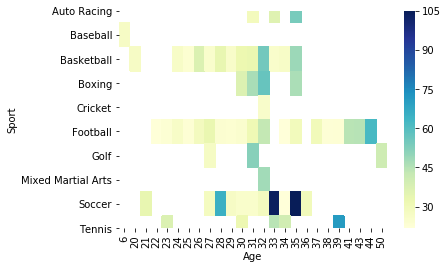

In [91]:
dff = pd.DataFrame(dfm_2020, columns = ['Sport','Age', 'earnings'])

heatmap2_data = pd.pivot_table(dff, values='earnings', 
                     index=['Sport'], 
                     columns='Age')

sns.heatmap(heatmap2_data, cmap="YlGnBu")

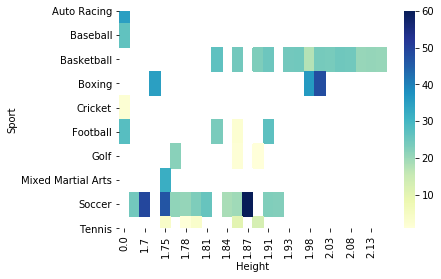

In [96]:
dff1 = pd.DataFrame(dfm_2020, columns = ['Sport','Height', 'Salary/Winnings'])

heatmap2_data = pd.pivot_table(dfm_2020, values='Salary/Winnings', 
                     index=['Sport'], 
                     columns='Height')

sns.heatmap(heatmap2_data, cmap="YlGnBu")

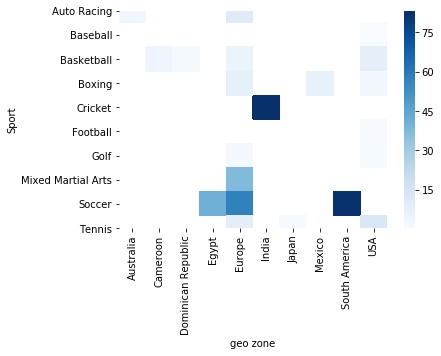

In [103]:
heatmap2_data = pd.pivot_table(dfm_2020, values='Followers on Instagram (M)', 
                     index=['Sport'], 
                     columns='geo zone')

sns.heatmap(heatmap2_data, cmap="Blues")